# Problem Description

## Background

X Education company, who sells online courses to industry professionals, gets its initial leads from online marketing on various websites. Leads implies people who might be interested to join their courses.

The company wishes to identify the most potential leads i.e. Hot Leads, some of which get converted and join their courses.

With this information, the sales team can focus more on communicating with the hot leads rather than making calls to everyone (from the pool of initial leads).

Their current lead conversion rate is quite poor i.e. 30%.

The CEO has given a target to increase their lead conversion rate to 80%.

For this, a model needs to be built which assigns lead score to each of the leads.
A customer assigned with a higher lead score would mean a higher conversion chance and 
a customer assigned with a lower lead score would mean a lower conversion chance.


## Data

There are 9000 data points with various feature variables such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc in the given 'leads' dataset.

The target attribute is 'Converted' which carries a value 1 or 0 with following meaning.
- 1: Lead was converted
- 0: Lead wasn't converted


## Goal

Build a logistic ML model which assigns a lead score between 0 to 100 to each of the leads.
- A higher lead score would indicate a hot lead and a lower score implies a cold lead.
- The 'converted' column will finally have values 1 or 0 against each of the leads.


# Read and Understand the dataset

In [1]:
# import required libraries
# import numpy as np
import pandas as pd

In [2]:
# read data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# check number of records and features in the data
leads.shape

(9240, 37)

In [4]:
# check basic information about null values and data types regarding the dataset features
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# A significant number of features have high null values

# Prospect ID and Lead Number are both unique values given to each person

In [6]:
# look at the conversion rate
leads.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [7]:
# check the percentage conversion rate
round((leads.Converted.value_counts()[1]/len(leads))*100,2)

38.54

In [8]:
# The number of leads who converted according to the given data is within 40%

In [9]:
# null values indicated/filled as NaN in the data
nan_values = leads.isnull().sum()
nan_values.sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

In [10]:
# null values filled as 'Select' in the data
select_values = (leads == 'Select').sum()
select_values.sort_values()

Prospect ID                                         0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Tags                                                0
A free copy of Mastering The Interview              0
Lead Quality                                        0
Get updates on DM Content                           0
Asymmetrique Activity Index                         0
Asymmetrique Profile Index                          0
Asymmetrique Activity Score                         0
Asymmetrique Profile Score                          0
I agree to pay the amount through cheque            0
Update me on Supply Chain Content                   0
Magazine                                            0
Newspaper Article                                   0
What matters most to you in 

In [11]:
# overall null values in the data
total_null_values = nan_values + select_values
total_null_values.sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [12]:
# percentage overall null values
total_perc_null_values = round((total_null_values.sort_values(ascending=False)/len(leads))*100, 2)
total_perc_null_values.sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
X Educatio

In [13]:
# The following columns have more than 30% null values
# How did you hear about X Education               78.46
# Lead Profile                                     74.19
# Lead Quality                                     51.59
# Asymmetrique Profile Score                       45.65
# Asymmetrique Activity Score                      45.65
# Asymmetrique Activity Index                      45.65
# Asymmetrique Profile Index                       45.65
# City                                             39.71
# Specialization                                   36.58
# Tags                                             36.29

# Data Cleaning

In [14]:
import warnings
warnings.filterwarnings('ignore')

### Null values

In [15]:
# discard columns with null values more than 30%

discard_columns = total_perc_null_values[total_perc_null_values>30]
discard_columns

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Profile Score            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
City                                  39.71
Specialization                        36.58
Tags                                  36.29
dtype: float64

In [16]:
leads.drop(columns=discard_columns.index, axis=1, inplace=True)

In [17]:
leads.shape

(9240, 27)

In [18]:
# check the null values filled as 'Select' in the data
(leads == 'Select').sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [19]:
final_null_values = leads.isnull().sum()
final_null_values.sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
X Education Forums                                  0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                                         0
Newspaper Article                                   0
Magazine                    

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [22]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [23]:
# treat missing values in 'What matters most to you in choosing a course' column

In [24]:
# look at the distinct values in 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [25]:
# replace the missing values with most occuring value in 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].fillna(value = leads['What matters most to you in choosing a course'].mode()[0], inplace=True)

In [26]:
# treat missing values in 'What is your current occupation' column

In [27]:
# look at the distinct values in 'What is your current occupation' column
leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [28]:
# replace the missing values with most occuring value in 'What is your current occupation' column
leads['What is your current occupation'].fillna(value = leads['What is your current occupation'].mode()[0], inplace=True)

In [29]:
# treat missing values in 'Country' column

In [30]:
# look at the distinct values in 'Country' column
leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [31]:
# replace the missing values with most occuring value in 'Country' column
leads['Country'].fillna(value = leads['Country'].mode()[0], inplace=True)

In [32]:
# treat missing values in 'TotalVisits' column

In [33]:
# look at the distinct values in 'TotalVisits' column
leads['TotalVisits'].value_counts(dropna=False)

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [34]:
leads['TotalVisits'].mean()

3.445237833681204

In [35]:
leads['TotalVisits'].median()

3.0

In [36]:
# replace the missing values with median value in 'TotalVisits' column
leads['TotalVisits'].fillna(value = leads['TotalVisits'].median(), inplace=True)

In [37]:
# treat missing values in 'Page Views Per Visit' column

In [38]:
# look at the distinct values in 'Page Views Per Visit' column
leads['Page Views Per Visit'].value_counts(dropna=False)

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: count, Length: 115, dtype: int64

In [39]:
leads['Page Views Per Visit'].mean()

2.3628199494672084

In [40]:
leads['Page Views Per Visit'].median()

2.0

In [41]:
# replace the missing values with median value in 'Page Views Per Visit' column
leads['Page Views Per Visit'].fillna(value = leads['Page Views Per Visit'].median(), inplace=True)

In [42]:
# treat missing values in 'Last Activity' column

In [43]:
# look at the distinct values in 'Last Activity' column
leads['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [44]:
# replace the missing values with most occuring value in 'Last Activity' column
leads['Last Activity'].fillna(value = leads['Last Activity'].mode()[0], inplace=True)

In [45]:
# treat missing values in 'Lead Source' column

In [46]:
# look at the distinct values in 'Lead Source' column
leads['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [47]:
# replace the missing values with most occuring value in 'Lead Source' column
leads['Lead Source'].fillna(value = leads['Lead Source'].mode()[0], inplace=True)

In [48]:
# all null values are treated
leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [49]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [50]:
# no more null values are present in the data

### Outliers

In [51]:
# look at description of numerical columns in the data
leads.describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
80%,641577.600000,1.000000,5.000000,1087.200000,4.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000


In [52]:
# 'ToTalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit' have outliers present
# The values can be limited within 99% percentile

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

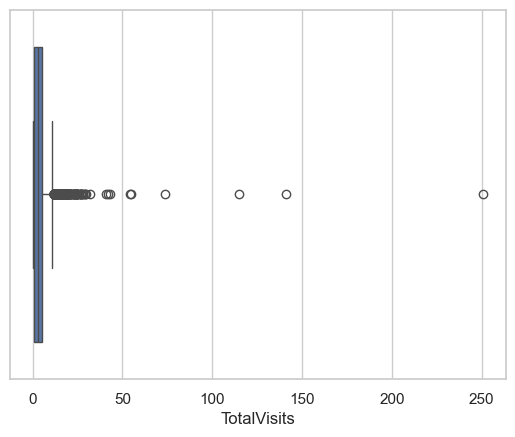

In [54]:
# Boxplot of 'TotalVisits' column

sns.set(style='whitegrid')
sns.boxplot(data=leads, x='TotalVisits')
plt.show()

In [55]:
leads.TotalVisits.quantile(q=[0.25, 0.50, 0.75, 0.90, 0.99, 1.00])

0.25      1.0
0.50      3.0
0.75      5.0
0.90      7.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

In [57]:
# most of the values in 'TotalVisits' column lie upto 17
# Rest of the values can be discarded

leads = leads[leads['TotalVisits']<=17]

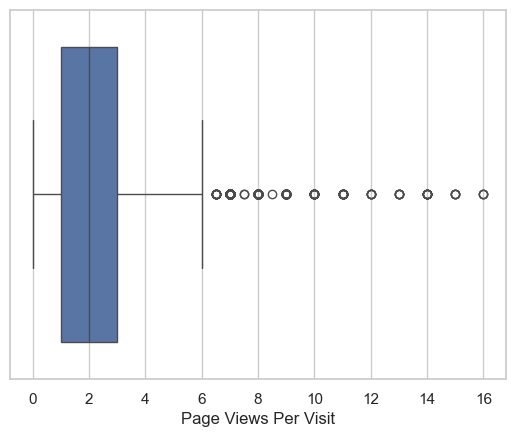

In [59]:
# Boxplot of 'Page Views Per Visit' column

sns.set(style='whitegrid')
sns.boxplot(data=leads, x='Page Views Per Visit')
plt.show()

In [60]:
leads['Page Views Per Visit'].quantile(q=[0.25, 0.50, 0.75, 0.90, 0.99, 1.00])

0.25     1.0
0.50     2.0
0.75     3.0
0.90     5.0
0.99     9.0
1.00    16.0
Name: Page Views Per Visit, dtype: float64

In [61]:
# most of the values in 'Page Views Per Visit' column lie upto 9
# Rest of the values can be discarded

leads = leads[leads['Page Views Per Visit']<=9]

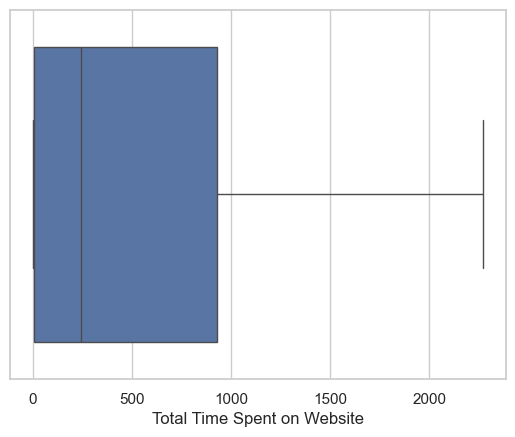

In [62]:
# Boxplot of 'Total Time Spent on Website' column

sns.set(style='whitegrid')
sns.boxplot(data=leads, x='Total Time Spent on Website')
plt.show()

In [63]:
leads['Total Time Spent on Website'].quantile(q=[0.25, 0.50, 0.75, 0.90, 0.99, 1.00])

0.25       9.00
0.50     246.00
0.75     930.00
0.90    1378.00
0.99    1840.11
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64

In [64]:
# Data in 'Total Time Spent on Website' column seems reasonable, can be kept

In [65]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000
mean,617197.434763,0.384488,3.140924,484.243784,2.262836
std,23392.354280,0.486501,2.881884,547.243973,1.881164
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596502.500000,0.000000,1.000000,9.000000,1.000000
50%,615557.000000,0.000000,3.000000,246.000000,2.000000
75%,637360.750000,1.000000,4.000000,930.000000,3.000000
max,660737.000000,1.000000,17.000000,2272.000000,9.000000


In [66]:
# outliers in the numerical columns are treated